# Imports for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Data loading

In [2]:
xls = pd.ExcelFile('Data.xlsx')
df_Plants = pd.read_excel(xls, 'plants')
df_FlightDates = pd.read_excel(xls, 'flight dates')
df_Planting = pd.read_excel(xls, 'planting')
df_Weather = pd.read_excel(xls, 'weather')

In [3]:
df_Plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [4]:
df_FlightDates

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01
5,468,2020-07-01
6,469,2020-07-06
7,471,2020-07-02
8,472,2020-07-02
9,473,2020-07-02


In [5]:
df_Planting

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2368,Ice 309,NaN,NaN,"2,1",NaN,387.0,NaN,NaN,NaN,80.0
2369,Ice 309,NaN,NaN,"2,2",NaN,400.0,NaN,NaN,NaN,274.0
2370,Ice 309,NaN,NaN,"2,3",NaN,319.0,NaN,NaN,NaN,224.0
2371,Ice 309,NaN,NaN,"2,4",NaN,155.0,NaN,NaN,NaN,249.0


In [6]:
df_Weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


# Dealing With Missing Values in Plant Table

Mean is calculated for leaves column in order to fill the leaves column missing values

In [7]:
df_Plants['Leaves'].fillna(value=df_Plants['Leaves'].mean(),inplace=True)
df_Plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaT,NaN


- Dropping Head Weight because it is not used for prediction

In [8]:
df_Plants = df_Plants.drop(columns='Head Weight (g)')

- Dropping all rows in the Remove column that contains value 'r'

In [9]:
df_Plants['Remove'].value_counts()

r    70
Name: Remove, dtype: int64

In [10]:
df_Plants_New = df_Plants.loc[df_Plants['Remove'] != 'r']

In [11]:
df_Plants_New

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaT,NaN


# Dropping NAN values in the Plants table

The NAN values in the plant table will be dropped but the Flight Date column is preserved so that it can be filled with Flight Date data from the Flight Dates Table

- Extraxcting Flight Date Column into a Flight_date Variable

In [12]:
Flight_date = df_Plants_New['Flight Date']

In [13]:
Flight_date

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4854   NaT
4855   NaT
4856   NaT
4857   NaT
4858   NaT
Name: Flight Date, Length: 4789, dtype: datetime64[ns]

- Dropping Flight Date Column from the Plants_New Data Frame so the NAN values can be dropped preserving the Flight Date Column

In [14]:
df_Plants_New_1 = df_Plants_New.drop(columns='Flight Date')

In [15]:
df_Plants_New_1

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaN
4855,738,2020-08-27,5,199.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaN
4856,738,2020-08-27,3,280.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaN
4857,738,2020-08-27,4,247.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaN


- Dropping all the NAN values but preserving the Remove column as instructions tells us not to drop NAN values of the Remove column

In [16]:
df_Plants_New_1.dropna(subset=[n for n in df_Plants_New_1 if n != 'Remove'],inplace= True)

- Plants data without NAN values except that of Remove column

In [17]:
df_Plants_New_1

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
75,402,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
77,402,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
78,402,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
79,402,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
80,402,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,735,2020-08-26,4,438.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN
4775,735,2020-08-26,5,213.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN
4776,735,2020-08-26,5,459.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN
4777,735,2020-08-26,1,355.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN


- Plants data with NAN values showing 4789 rows

In [18]:
df_Plants_New

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaT,NaN


- Merging Flight Date column back into Plants Table

In [19]:
df_Plants_New_1['Flight_date'] = Flight_date

In [20]:
df_Plants_New_1

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight_date
75,402,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
77,402,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
78,402,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
79,402,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
80,402,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,735,2020-08-26,4,438.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN,NaT
4775,735,2020-08-26,5,213.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN,NaT
4776,735,2020-08-26,5,459.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN,NaT
4777,735,2020-08-26,1,355.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN,NaT


- Resetting Index 

In [21]:
df_Plants_New_1.reset_index(drop=True, inplace=True)

In [22]:
df_Plants_New_1

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight_date
0,402,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
1,402,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
2,402,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
3,402,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
4,402,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,735,2020-08-26,4,438.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN,NaT
4423,735,2020-08-26,5,213.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN,NaT
4424,735,2020-08-26,5,459.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN,NaT
4425,735,2020-08-26,1,355.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN,NaT


- Renaming flight_date column name to more readable and useable name

In [23]:
df_Plants_New_1.rename(columns={"Flight_date": "Flight Date"},inplace=True)

In [24]:
df_Plants_New_1

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date
0,402,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
1,402,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
2,402,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
3,402,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
4,402,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,735,2020-08-26,4,438.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN,NaT
4423,735,2020-08-26,5,213.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN,NaT
4424,735,2020-08-26,5,459.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN,NaT
4425,735,2020-08-26,1,355.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN,NaT


# Filling missing values in the Flight Date column

- The values of flight date are filled with data from FlightDate Data Frame by mapping values corresponding to the Batch Number

In [25]:
df= df_FlightDates.join(df_Plants_New_1.set_index('Batch Number'), on='Batch Number',lsuffix='.')

In [26]:
df

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,NaT
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,NaT
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,NaT
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,NaT


- As you can see in the above-mentioned data frame that Flight Date are mapped with respect to the batch number but have created a duplicate column. The duplicate column is to be dropped and the new column is to be renamed for readability purpose

In [27]:
df.drop(columns='Flight Date',inplace=True)

In [28]:
df.rename(columns={"Flight Date.": "Flight Date"},inplace=True)

In [29]:
df

,Batch Number,Flight Date,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


- Fixing Index as the above-mentioned table shows indexing is incorrect. Then storing the Dataframe in a df_plot variable for plotting purposes

In [30]:
df_plot = df.reset_index(drop=True)

In [31]:
df_plot

,Batch Number,Flight Date,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
3191,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
3192,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
3193,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


In [85]:
metrics = df_plot.describe()

In [86]:
metrics

,Batch Number,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID
count,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000
mean,584.707355,2.965884,557.913187,110.210955,102.347731,1.058552,1.707000e+01,0.259650,479.901095,401.280438
std,77.788209,1.433048,300.999295,41.020513,33.544402,0.166577,3.553270e-15,0.137770,194.333710,438.192536
min,402.000000,1.000000,0.632000,10.000000,10.000000,0.285714,1.707000e+01,0.014551,93.000000,4.000000
25%,517.000000,2.000000,309.000000,80.000000,80.000000,1.000000,1.707000e+01,0.181072,338.500000,84.000000
50%,608.000000,3.000000,545.000000,125.000000,110.000000,1.066667,1.707000e+01,0.238480,459.000000,252.000000
75%,649.000000,4.000000,781.000000,140.000000,130.000000,1.160357,1.707000e+01,0.312726,586.000000,555.000000
max,693.000000,5.000000,1978.000000,185.000000,178.000000,1.687500,1.707000e+01,2.387324,1276.000000,2019.000000


# Pre Processing Planting and Weather Tables

- Dropping empty and unnamed columns in Planting data

In [32]:
df_Planting.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True)

In [33]:
df_Planting

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
2368,Ice 309,"2,1",387.0,NaN,NaN,80.0
2369,Ice 309,"2,2",400.0,NaN,NaN,274.0
2370,Ice 309,"2,3",319.0,NaN,NaN,224.0
2371,Ice 309,"2,4",155.0,NaN,NaN,249.0


In [34]:
df_Planting.isnull().sum()

Crop              420
Plant_Date        420
Region            420
Planting_Batch    551
Volume_Planted    552
Planting_Wk       420
dtype: int64

- Dropping all the Nan Values in the planting table

In [35]:
df_Planting.dropna()

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


- Dropping NAN values in weather Table

In [36]:
df_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   int64         
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Wind Speed [max]         2556 non-null   float64       
 5   Battery Voltage [last]   2556 non-null   int64         
 6   Leaf Wetness [time]      2556 non-null   int64         
 7   Air Temperature [avg]    2556 non-null   float64       
 8   Air Temperature [max]    2556 non-null   float64       
 9   Air Temperature [min]    2556 non-null   float64       
 10  Relative Humidity [avg]  2556 non-null   float64       
 11  Dew Point [avg]          2553 non-null   float64       
 12  Dew Point [min]          2510 non-

In [37]:
df_Weather.isnull().sum()

Unnamed: 0                  0
Solar Radiation [avg]       0
Precipitation [sum]         0
Wind Speed [avg]            0
Wind Speed [max]            0
Battery Voltage [last]      0
Leaf Wetness [time]         0
Air Temperature [avg]       0
Air Temperature [max]       0
Air Temperature [min]       0
Relative Humidity [avg]     0
Dew Point [avg]             3
Dew Point [min]            46
ET0 [result]               66
dtype: int64

In [38]:
df_Weather.dropna()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
5,2014-05-19,261,0.0,3.0,6.4,6854,490,18.26,26.50,9.42,66.41,10.8,8.5,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,2021-05-11,211,0.2,2.0,5.4,6874,0,11.18,17.18,3.52,86.24,8.4,3.4,2.9
2542,2021-05-12,190,0.0,1.8,4.4,6864,0,11.28,16.29,5.76,85.16,8.3,4.9,2.6
2547,2021-05-15,101,3.2,1.5,4.1,6874,0,9.70,11.98,6.83,99.87,9.5,6.7,1.2
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4


- Renaming unnamed column

In [39]:
df_Weather.rename(columns={"Unnamed: 0": "Weather [Date]"},inplace=True)

In [40]:
df_Weather

,Weather [Date],Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


# Analysis after Pre Processing 4 given Tables

- After pre rpocessing all the 4 tables namely: 
    - Plants
    - Flight Dates
    - Planting 
    - Weather
    
I have reached to an understanding that duration when the crops are ready is the difference between the Plant Date and the manual check date on which the plant is 70%, 85% and 98% ready. Hence, this difference will tell the days to yeild of the plant. 

I am considering df as the clean and ready to use data frame which I have made above in the notebook. Df is basically Plant Table with Data from Flight Table

In [41]:
df['Days to Yield']  = (df['Check Date'] - df['Plant Date']).dt.days

In [42]:
df

,Batch Number,Flight Date,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Yield
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


In [43]:
df.reset_index(drop=True)

,Batch Number,Flight Date,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Yield
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
3191,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
3192,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
3193,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


In [44]:
df['Days to Yield'].value_counts()

43    415
45    240
32    240
38    222
41    197
33    189
39    184
30    175
37    157
40    153
44    139
31    132
42    130
34    117
49    117
46     89
47     68
35     45
36     45
54     37
48     35
50     25
29     24
53     20
Name: Days to Yield, dtype: int64

- Plotting Days to yeild with respect to the count of Days to yeild

<function matplotlib.pyplot.show(close=None, block=None)>

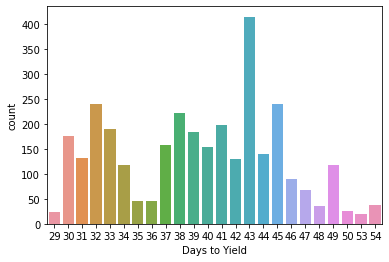

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Days to Yield' , data=df )
plt.show

# Finding Correlation between the Data

- After analysing the data in the Data frame I have reached to a conclusion that Class and Days to yeild are the 2 target labels that we want to predict beacuse these 2 column provides us with information about the expected size of the crops in the future date

Calculating the correlation with respect to the class column

In [46]:
corr_matrix =df.corr()
corr_matrix['Class'].sort_values(ascending=True)

Polar Diameter (mm)    -0.025636
Leaf Area (cm^2)       -0.024840
Radial Diameter (mm)   -0.023834
Square ID              -0.023102
Fresh Weight (g)       -0.022148
Days to Yield          -0.018289
Batch Number           -0.004567
Diameter Ratio         -0.004153
Density (kg/L)         -0.000295
Class                   1.000000
Leaves                       NaN
Name: Class, dtype: float64

In [47]:
df.corr()

,Batch Number,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Days to Yield
Batch Number,1.000000,-0.004567,-0.258633,-0.089287,-0.043071,-0.159736,NaN,-0.116705,0.155638,-0.380898,-0.352561
Class,-0.004567,1.000000,-0.022148,-0.023834,-0.025636,-0.004153,NaN,-0.000295,-0.024840,-0.023102,-0.018289
Fresh Weight (g),-0.258633,-0.022148,1.000000,0.855431,0.808664,0.488765,NaN,0.247061,0.188915,0.030477,0.685997
Radial Diameter (mm),-0.089287,-0.023834,0.855431,1.000000,0.933685,0.631357,NaN,0.025384,0.105467,-0.018709,0.602020
Polar Diameter (mm),-0.043071,-0.025636,0.808664,0.933685,1.000000,0.334860,NaN,-0.044358,0.055711,-0.010238,0.528821
Diameter Ratio,-0.159736,-0.004153,0.488765,0.631357,0.334860,1.000000,NaN,0.065680,0.151568,-0.031279,0.450737
Leaves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Density (kg/L),-0.116705,-0.000295,0.247061,0.025384,-0.044358,0.065680,NaN,1.000000,0.062765,0.023807,0.262974
Leaf Area (cm^2),0.155638,-0.024840,0.188915,0.105467,0.055711,0.151568,NaN,0.062765,1.000000,-0.090520,0.087137
Square ID,-0.380898,-0.023102,0.030477,-0.018709,-0.010238,-0.031279,NaN,0.023807,-0.090520,1.000000,0.059457


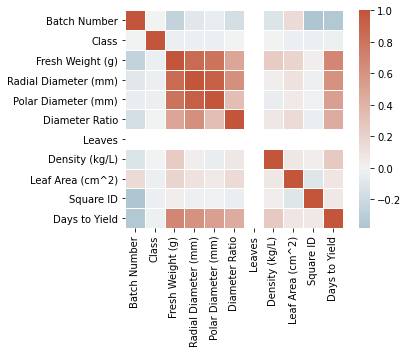

In [48]:
sns.heatmap(corr_matrix, center=0, square=True, linewidths=.5, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

- Extracting Target Labels into Y

In [49]:
y = df[['Class','Days to Yield']]

In [50]:
y.reset_index(inplace=True)

In [51]:
y

,index,Class,Days to Yield
0,0,2,41
1,0,5,41
2,0,5,41
3,0,3,41
4,0,1,41
...,...,...,...
3190,49,1,40
3191,49,1,40
3192,49,3,40
3193,49,2,40


In [52]:
df.reset_index(inplace=True)

In [53]:
df

,index,Batch Number,Flight Date,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Yield
0,0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
1,0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
2,0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
3,0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
4,0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
3191,49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
3192,49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
3193,49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


-  Removing Labels from the main Data frame

In [54]:
df.drop(columns=['Class','Days to Yield'],inplace=True)

In [55]:
df

,index,Batch Number,Flight Date,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
1,0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
2,0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
3,0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
4,0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
3191,49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
3192,49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
3193,49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


In [56]:
df.drop(columns=['index'])

,Batch Number,Flight Date,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
1,402,2020-04-30,2020-04-11,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
2,402,2020-04-30,2020-04-11,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
3,402,2020-04-30,2020-04-11,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
4,402,2020-04-30,2020-04-11,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
3191,693,2020-09-10,2020-08-08,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
3192,693,2020-09-10,2020-08-08,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
3193,693,2020-09-10,2020-08-08,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


# Converting the Data Frame into a Standard Range of values

- In order to convert the data frame into a standard range of values for prediction after extracting labels, Standard Scaler is applied

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 3195 non-null   int64         
 1   Batch Number          3195 non-null   int64         
 2   Flight Date           3195 non-null   datetime64[ns]
 3   Plant Date            3195 non-null   datetime64[ns]
 4   Fresh Weight (g)      3195 non-null   float64       
 5   Radial Diameter (mm)  3195 non-null   float64       
 6   Polar Diameter (mm)   3195 non-null   float64       
 7   Diameter Ratio        3195 non-null   float64       
 8   Leaves                3195 non-null   float64       
 9   Density (kg/L)        3195 non-null   float64       
 10  Leaf Area (cm^2)      3195 non-null   float64       
 11  Square ID             3195 non-null   int64         
 12  Check Date            3195 non-null   datetime64[ns]
 13  Remove            

- In order to calculate the Standard Scaler of the data frame, I have to split the Flight Date, Plant Date and Check Date into Days, Month and Year in order to convert from datetime64[ns] format to Integer format so that Standard Scaler can be applied

- Plant Date Conversion from datetime64[ns] format to Integer format

In [58]:
df['Plant Day'] = df['Plant Date'].dt.day
df['Plant Yonth'] = df['Plant Date'].dt.month
df['Plant Year'] = df['Plant Date'].dt.year


In [59]:
df

,index,Batch Number,Flight Date,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Plant Day,Plant Yonth,Plant Year
0,0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,11,4,2020
1,0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,11,4,2020
2,0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,11,4,2020
3,0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,11,4,2020
4,0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,11,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,8,8,2020
3191,49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,8,8,2020
3192,49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,8,8,2020
3193,49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,8,8,2020


- Flight Date Conversion from datetime64[ns] format to Integer format

In [60]:
df['Flight Day'] = df['Flight Date'].dt.day
df['Flight Month'] = df['Flight Date'].dt.month
df['Flight Year'] = df['Flight Date'].dt.year

In [61]:
df

,index,Batch Number,Flight Date,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Plant Day,Plant Yonth,Plant Year,Flight Day,Flight Month,Flight Year
0,0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,11,4,2020,30,4,2020
1,0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,11,4,2020,30,4,2020
2,0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,11,4,2020,30,4,2020
3,0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,11,4,2020,30,4,2020
4,0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,11,4,2020,30,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,8,8,2020,10,9,2020
3191,49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,8,8,2020,10,9,2020
3192,49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,8,8,2020,10,9,2020
3193,49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,8,8,2020,10,9,2020


- Check Date Conversion from datetime64[ns] format to Integer format

In [62]:
df['Check Day'] = df['Check Date'].dt.day
df['Check Month'] = df['Check Date'].dt.month
df['Check Year'] = df['Check Date'].dt.year

In [63]:
df

,index,Batch Number,Flight Date,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),...,Remove,Plant Day,Plant Yonth,Plant Year,Flight Day,Flight Month,Flight Year,Check Day,Check Month,Check Year
0,0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,1.000000,17.07,0.149230,...,NaN,11,4,2020,30,4,2020,22,5,2020
1,0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,1.000000,17.07,0.298416,...,NaN,11,4,2020,30,4,2020,22,5,2020
2,0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,1.000000,17.07,0.198625,...,NaN,11,4,2020,30,4,2020,22,5,2020
3,0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,1.000000,17.07,0.208891,...,NaN,11,4,2020,30,4,2020,22,5,2020
4,0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,1.000000,17.07,0.122498,...,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,0.900000,17.07,0.294731,...,NaN,8,8,2020,10,9,2020,17,9,2020
3191,49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,0.800000,17.07,0.190986,...,NaN,8,8,2020,10,9,2020,17,9,2020
3192,49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,1.000000,17.07,0.179049,...,NaN,8,8,2020,10,9,2020,17,9,2020
3193,49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,1.111111,17.07,0.169765,...,NaN,8,8,2020,10,9,2020,17,9,2020


- Dropping Plant Date, Flight Date and Check Date from the data fram to implement Standard Scaler

In [64]:
df.drop(columns=['Flight Date','Plant Date','Check Date'],inplace=True)

In [65]:
X = df.reset_index(drop=True)

In [66]:
X

,index,Batch Number,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Remove,Plant Day,Plant Yonth,Plant Year,Flight Day,Flight Month,Flight Year,Check Day,Check Month,Check Year
0,0,402,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
1,0,402,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
2,0,402,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
3,0,402,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
4,0,402,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,49,693,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3191,49,693,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3192,49,693,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3193,49,693,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,NaN,8,8,2020,10,9,2020,17,9,2020


In [67]:
X.drop(columns=['index'],inplace=True)

In [68]:
X

,Batch Number,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Remove,Plant Day,Plant Yonth,Plant Year,Flight Day,Flight Month,Flight Year,Check Day,Check Month,Check Year
0,402,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
1,402,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
2,402,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
3,402,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
4,402,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3191,693,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3192,693,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3193,693,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,NaN,8,8,2020,10,9,2020,17,9,2020


- Applying Standard Scaler to bring the data into a Standard data range

In [69]:
scaled = StandardScaler()

In [70]:
X = scaled.fit_transform(X)

c:\python3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\python3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [71]:
X

array([[-2.34914722, -1.14607304, -1.34614594, ...,  0.94960168,
        -3.11424346,  0.        ],
       [-2.34914722, -1.25904779, -1.71187389, ...,  0.94960168,
        -3.11424346,  0.        ],
       [-2.34914722, -1.24575665, -1.46805526, ...,  0.94960168,
        -3.11424346,  0.        ],
       ...,
       [ 1.39236521, -1.41521878, -1.71187389, ...,  0.37836027,
         1.4156941 ,  0.        ],
       [ 1.39236521, -1.24575665, -1.46805526, ...,  0.37836027,
         1.4156941 ,  0.        ],
       [ 1.39236521, -1.52819354, -1.95569252, ...,  0.37836027,
         1.4156941 ,  0.        ]])

In [72]:
y

,index,Class,Days to Yield
0,0,2,41
1,0,5,41
2,0,5,41
3,0,3,41
4,0,1,41
...,...,...,...
3190,49,1,40
3191,49,1,40
3192,49,3,40
3193,49,2,40


In [73]:
y.drop(columns=['index'],inplace=True)

c:\python3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
y

,Class,Days to Yield
0,2,41
1,5,41
2,5,41
3,3,41
4,1,41
...,...,...
3190,1,40
3191,1,40
3192,3,40
3193,2,40


# Visualizing of the Data from the Data Frame df

- Histogram of cleaned df above which is labelled as df_plot

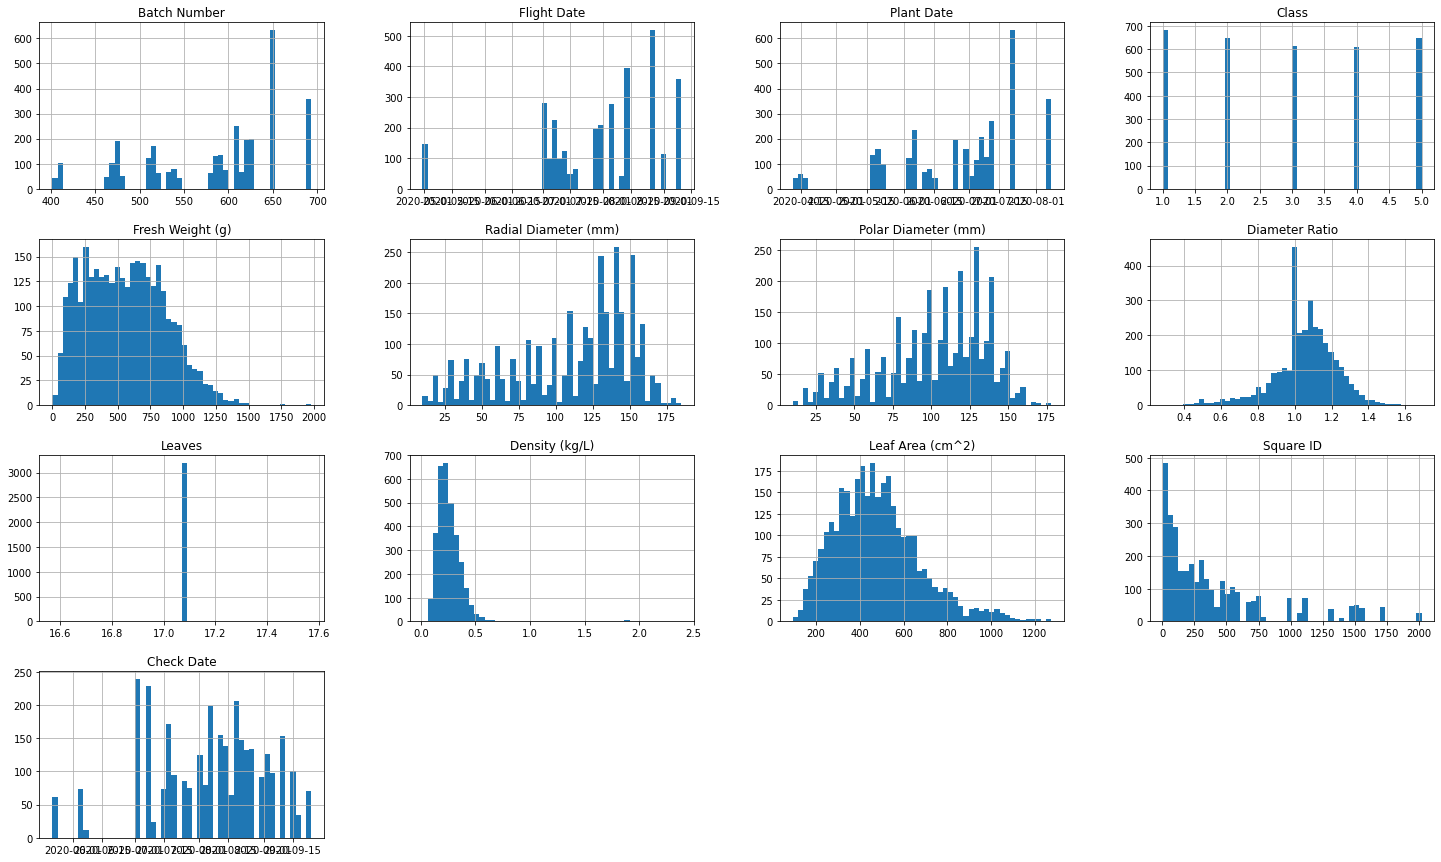

In [75]:
_ = df_plot.hist(bins=50, figsize=(25,15))

- Boxplot of Days to yeild with respect to the class

<AxesSubplot:xlabel='Class', ylabel='Days to Yield'>

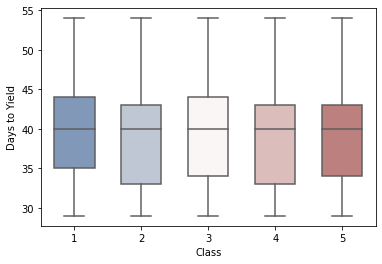

In [93]:
sns.boxplot(y="Days to Yield", x="Class", data=y,
            whis=[0, 100], width=.6, palette="vlag")